In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab/Callback")

In [9]:
from learningratefinder import LearningRateFinder

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [13]:
MIN_LR = 1e-5

In [14]:
model = create_model()
opt = tf.keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/2
1875/1875 [==============================] - 12s 3ms/step - loss: 2.3797 - accuracy: 0.1100
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6246 - accuracy: 0.5638


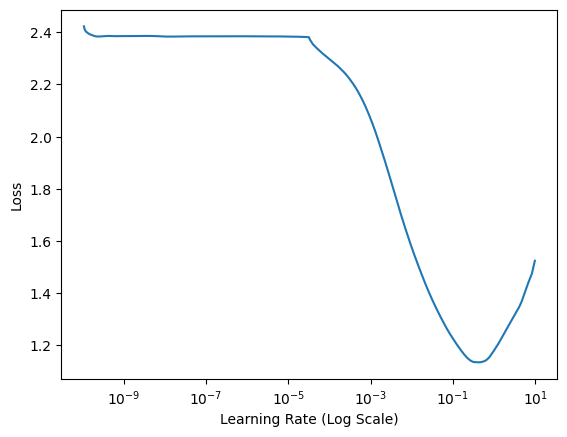

In [15]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()

# based on:

https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/